In [ ]:
from lib.utils.functions import *

In [26]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 15]

In [3]:
characters_df = import_character_list('Got Characters.csv')

In [4]:
characters_df

Unnamed: 0             name first_name
0              0   Addam Marbrand      Addam
1              1     Addison Hill    Addison
2              2    Adrack Humble     Adrack
3              3   Adrian Tarbeck     Adrian
4              4  Aegon Blackfyre      Aegon
...          ...              ...        ...
1261        1261      Yorko Terys      Yorko
1262        1262           Ysabel     Ysabel
1263        1263           Ysilla     Ysilla
1264        1264     Ysilla Royce     Ysilla
1265        1265            Zollo      Zollo

[1266 rows x 3 columns]

In [5]:
all_books = import_books(r"C:\Users\Thyfus\Desktop\dataProject\GoT project\Books")

In [6]:
all_books

[<DirEntry '1 A Game of Thrones.txt'>,
 <DirEntry '2 A Clash of Kings.txt'>,
 <DirEntry '3 A Storm of Swords.txt'>,
 <DirEntry '4 A Feast for Crows.txt'>,
 <DirEntry '5 A Dance with Dragons.txt'>]

C:\Users\Thyfus\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


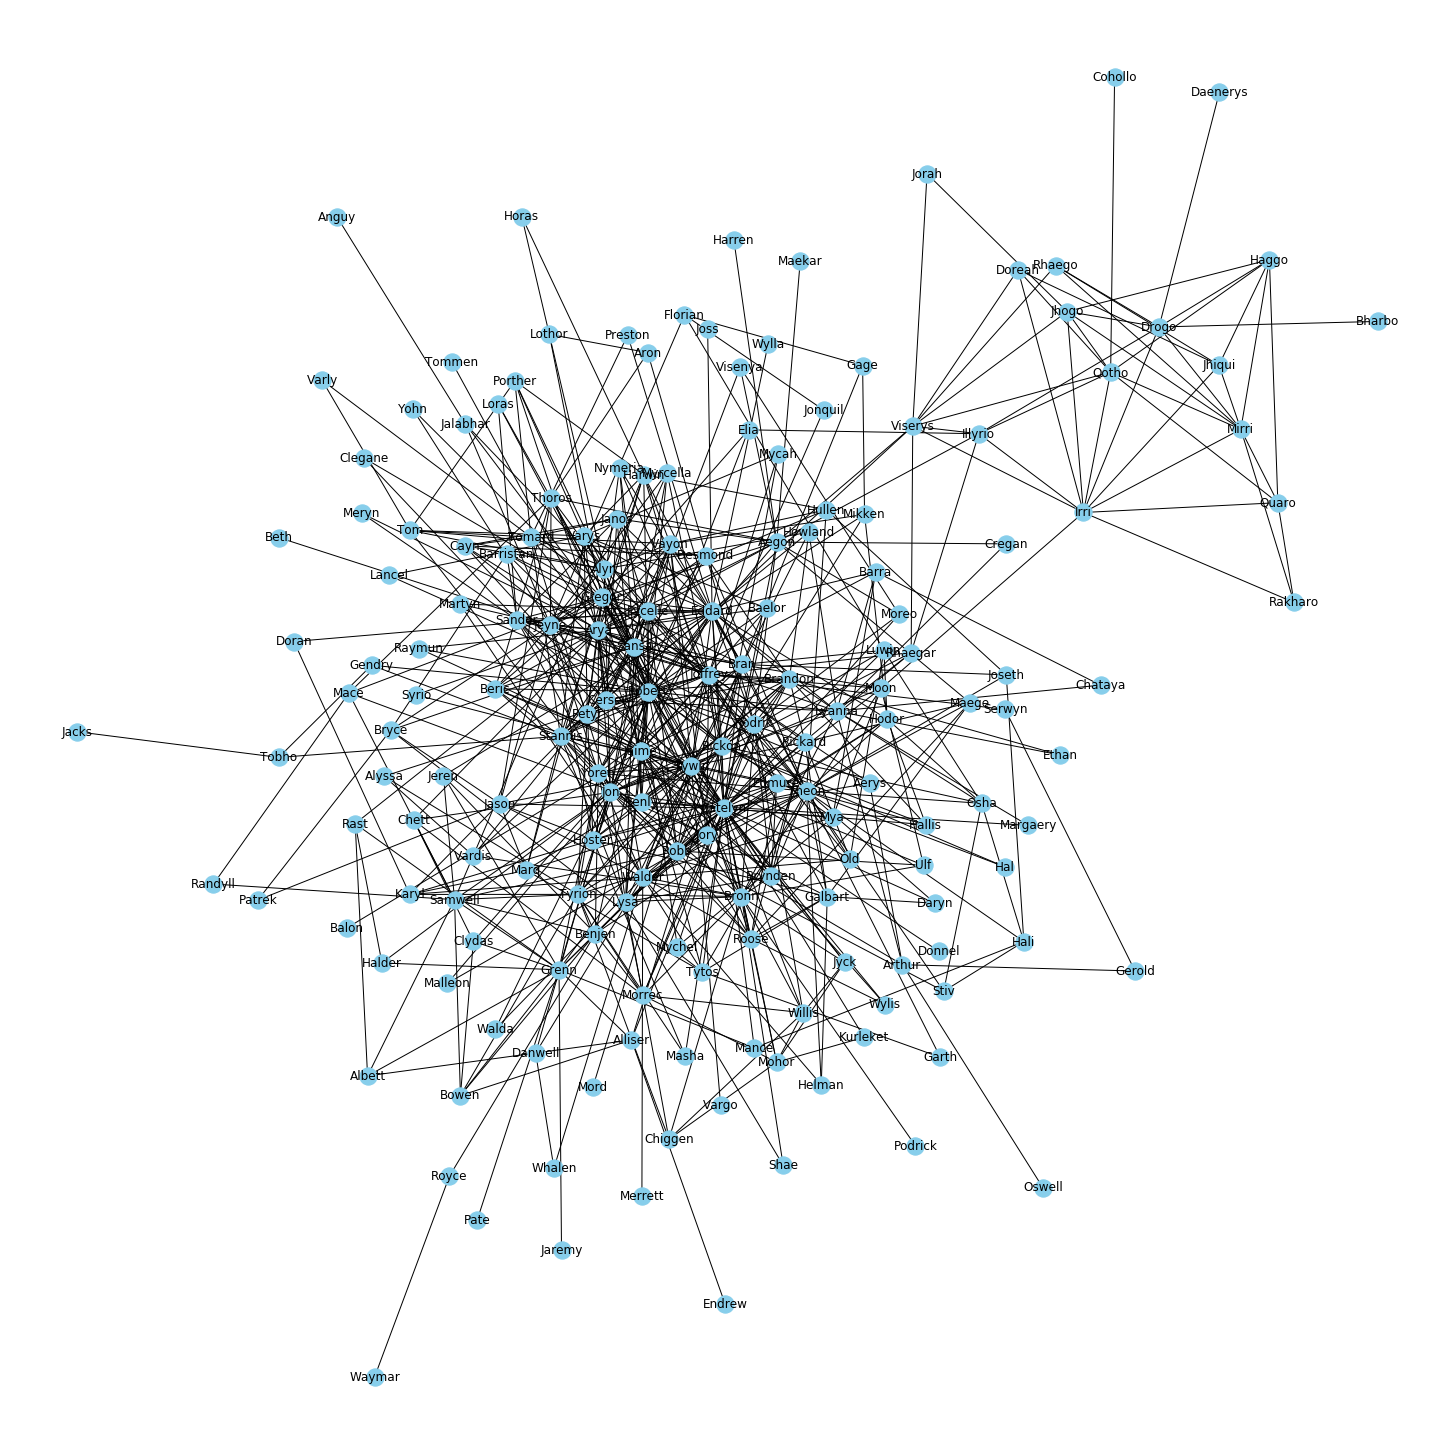

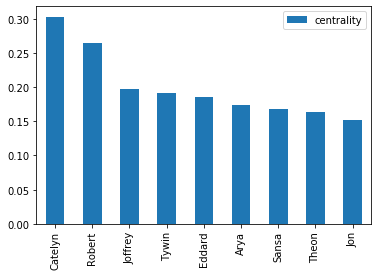

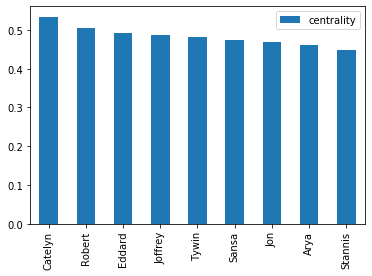

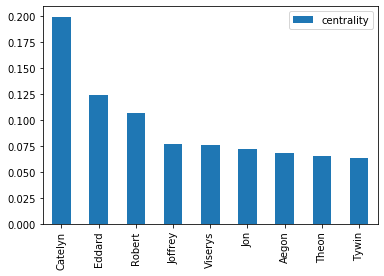

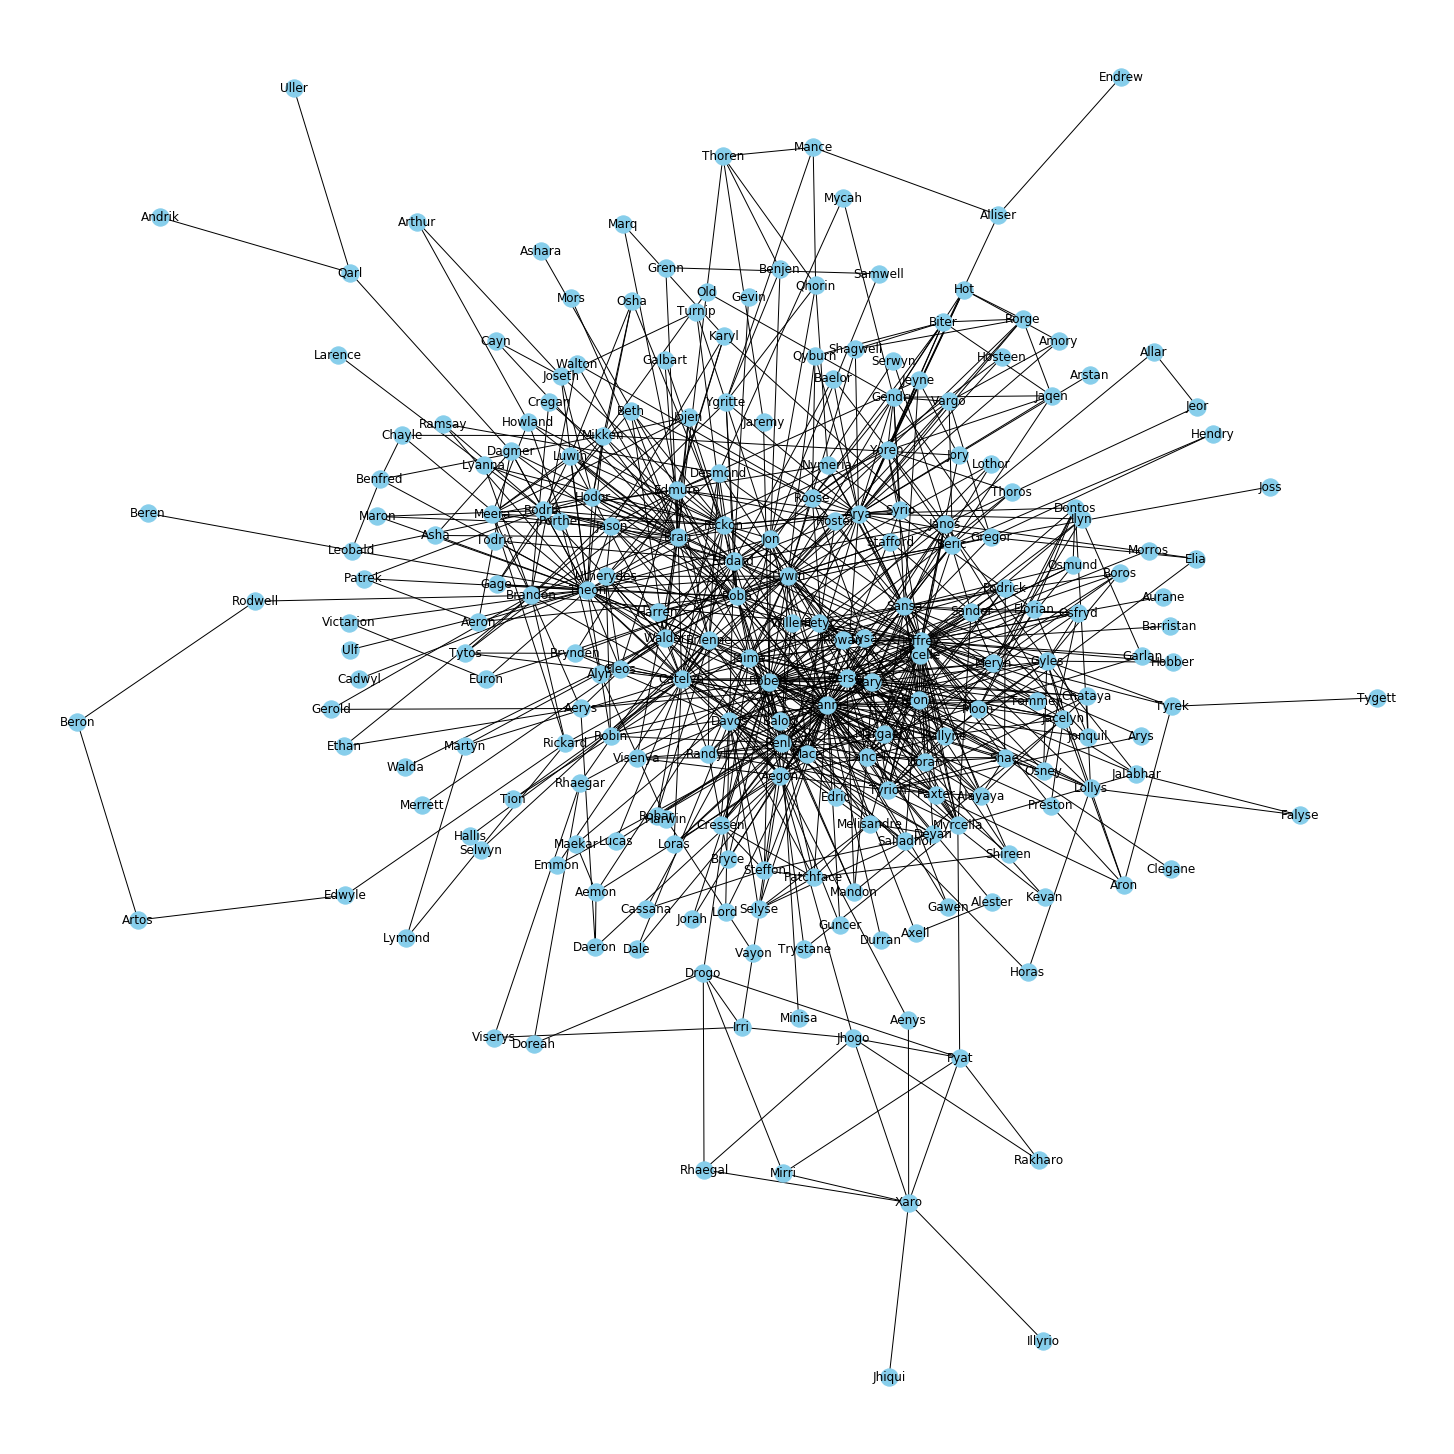

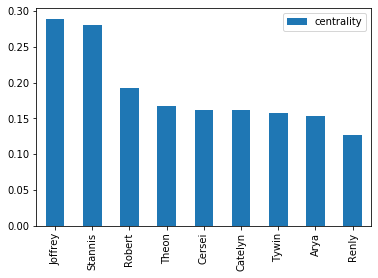

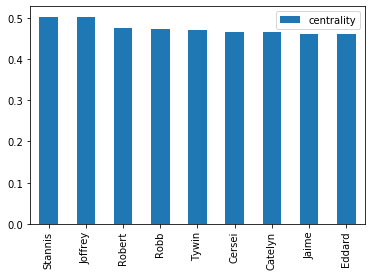

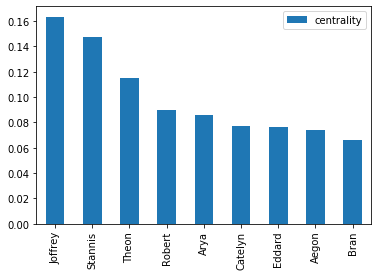

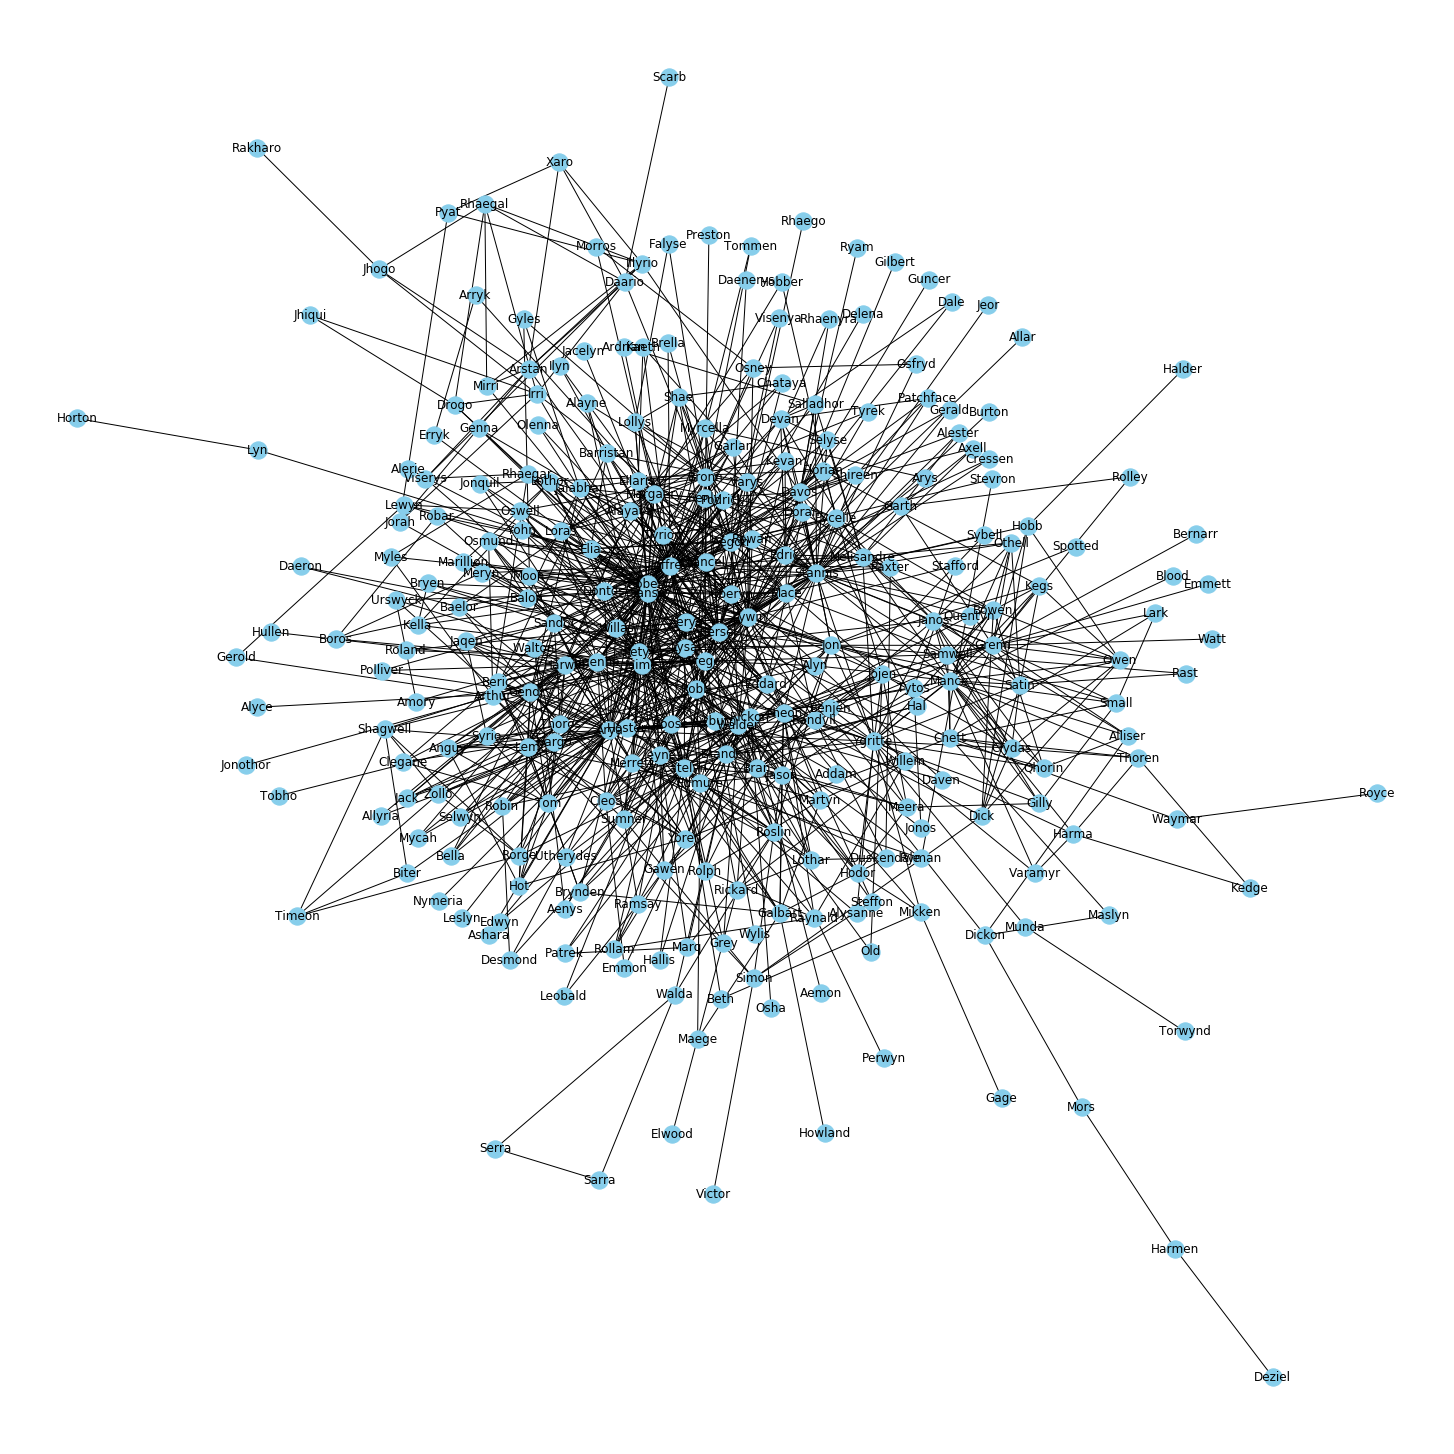

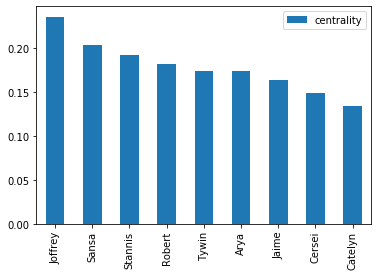

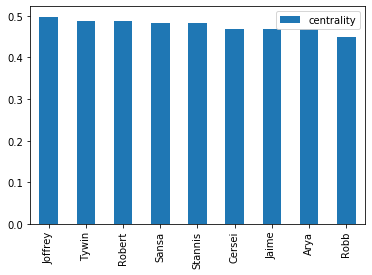

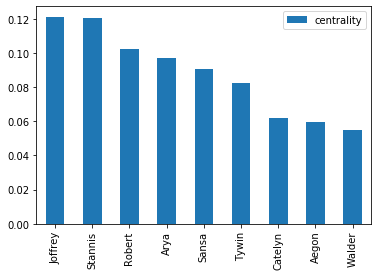

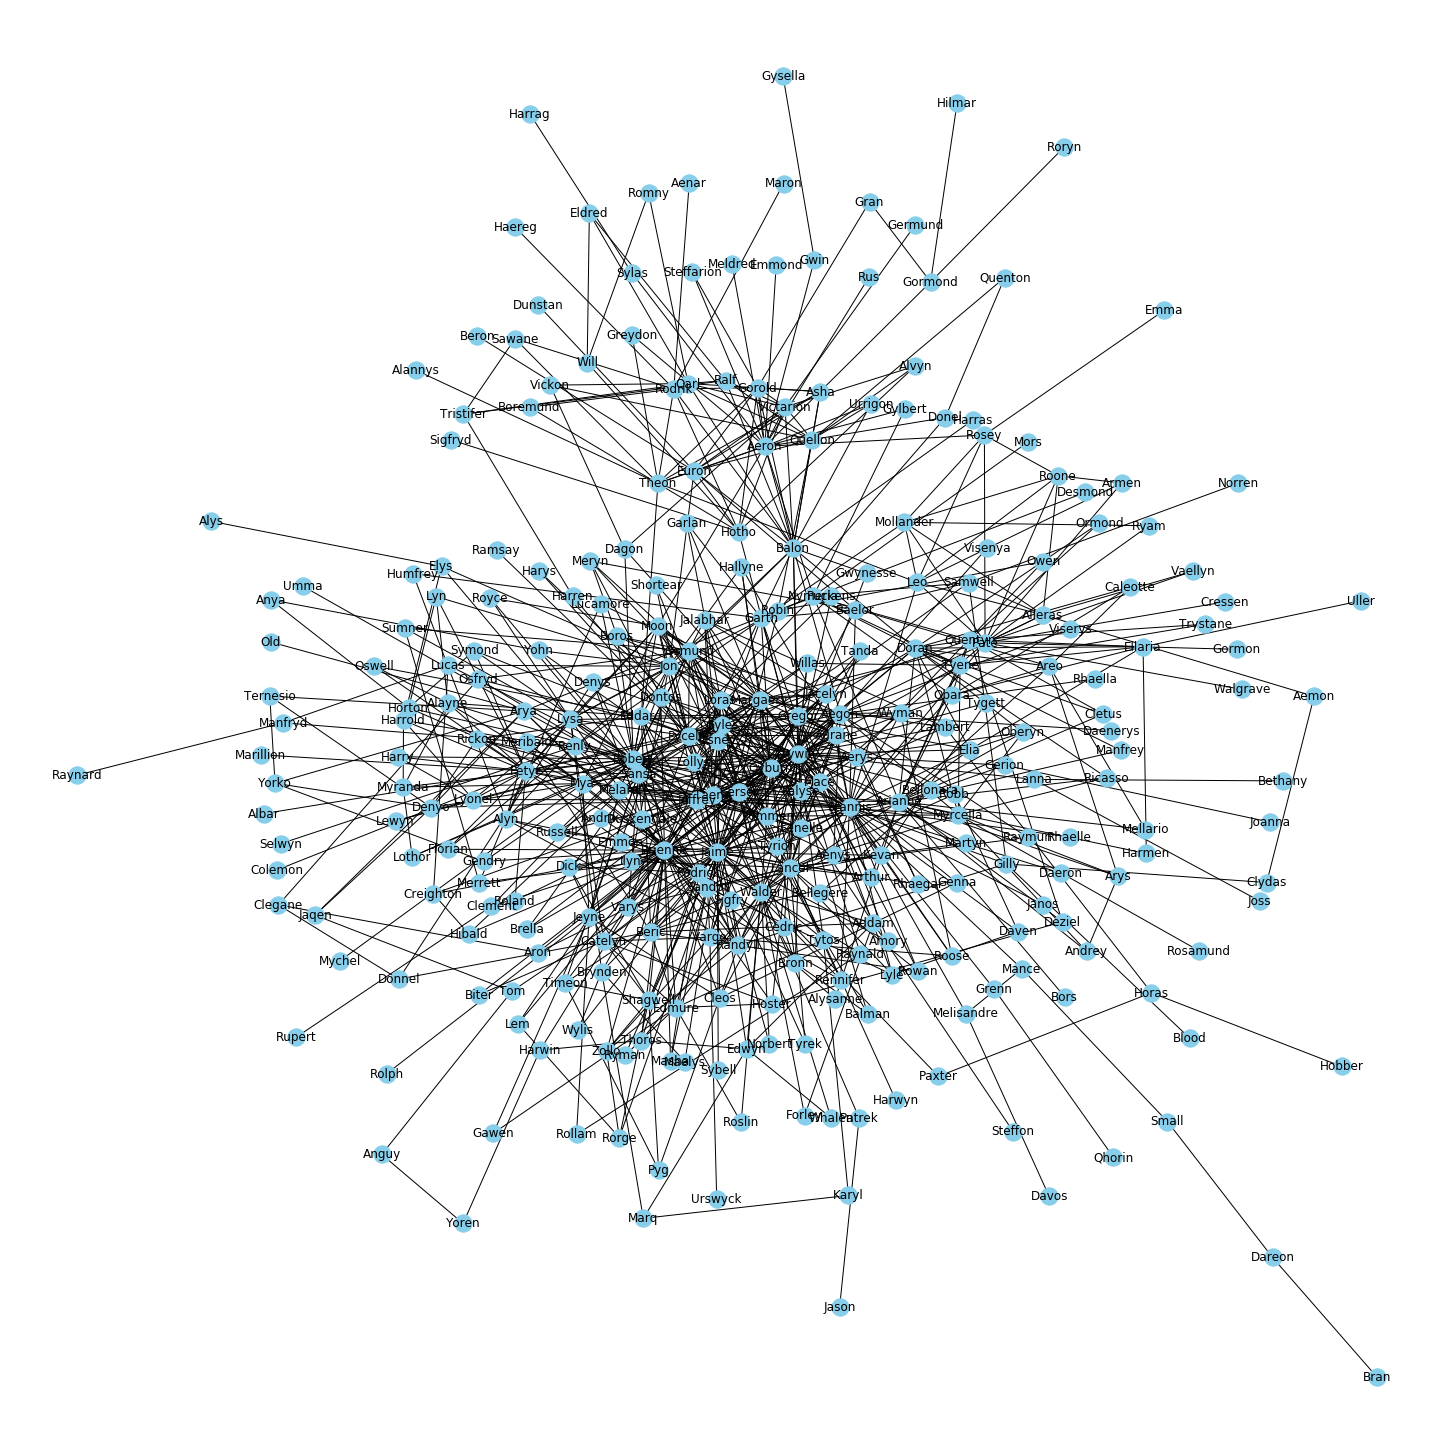

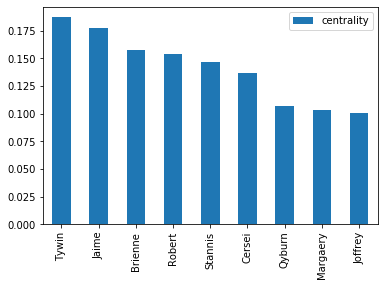

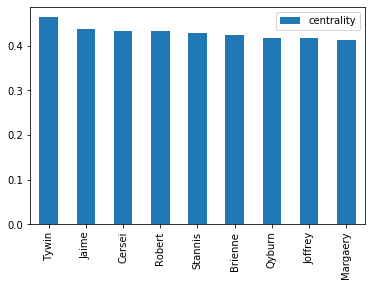

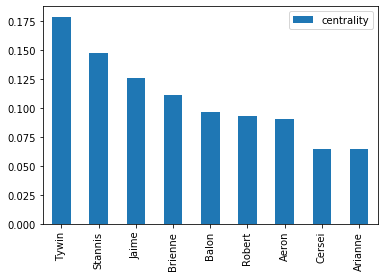

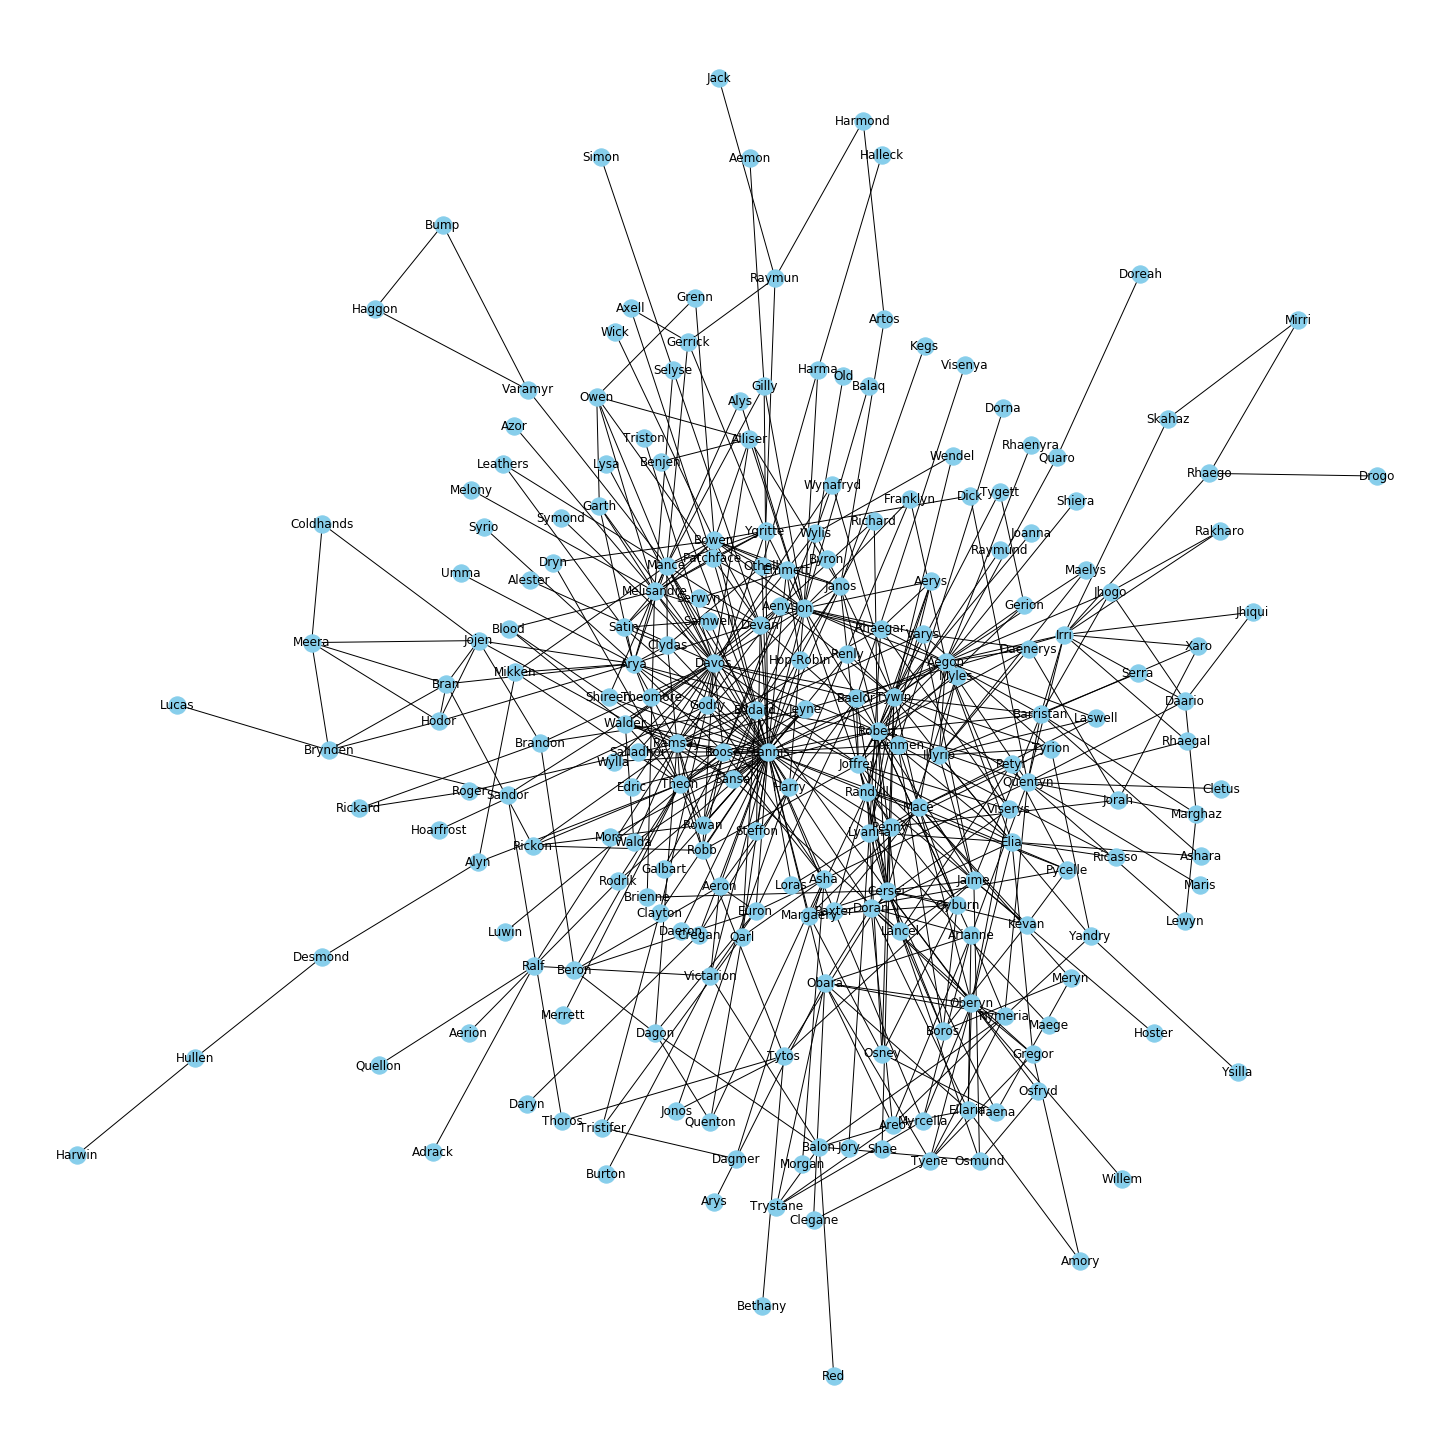

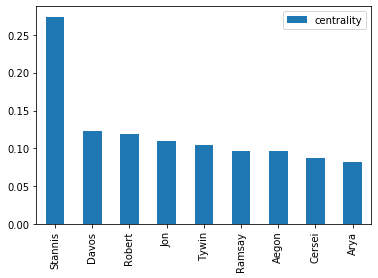

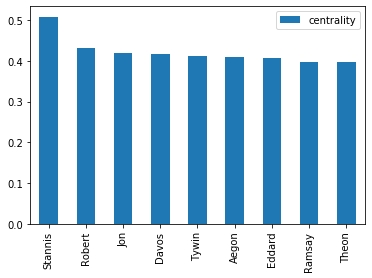

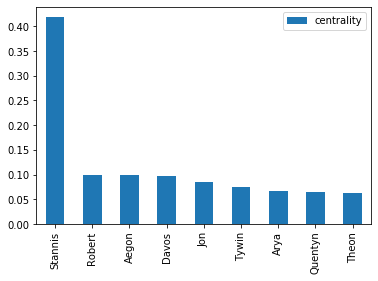

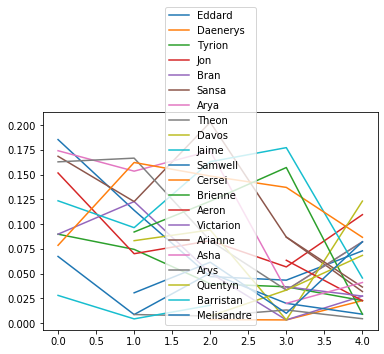

In [8]:
books_graph = []

for book in all_books:
    
    #load the english module; NER stands for named entity recognition
    book_doc = NER(book)
    
    #loop through sentences, store named entities for each sentence
    sent_entity_df = get_ne_list_per_sentence(book_doc)
    
    #applying the function 
    sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, characters_df))
    
    #filtering out sentences without entities
    sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
    
    #Take only first name of characters
    sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] for item in x])
    
    #looking for relationships between characters by scanning the text and aggregating all the duplicated relationships, this will include reverser relationships; Eddard Stark	Bran and Bran	Eddard Stark for example
    relationship_df = create_relationships(df = sent_entity_df_filtered, window_size = 5)
    
    #creates the visualization of the relationship_df
    #this is a simplistic model so the only edge attribute to take into account will be the value column of the data frame
    relationships_graph(relationship_df)
    
    # Create a graph from a pandas dataframe
    G = nx.from_pandas_edgelist(relationship_df, 
                                source = "source", 
                                target = "target", 
                                edge_attr = "value", 
                                create_using = nx.Graph())
    
    books_graph.append(G) 
    
# Creating a list of degree centrality of all the books
char_importance = [nx.degree_centrality(book) for book in books_graph]

# Creating a DataFrame from the list of degree centralities in all the books
char_importance_df = pd.DataFrame.from_records(char_importance)

# Plotting the degree centrality evolution of 5 main characters
char_importance_df[['Eddard', 'Daenerys', 'Tyrion', 'Jon', 'Bran', 'Sansa', 'Arya', 'Theon', 'Davos', 'Jaime', 'Samwell', 'Cersei', 'Brienne', 'Aeron', 'Victarion', 'Arianne', 'Asha', 'Arys', 'Quentyn', 'Barristan', 'Melisandre']].plot()

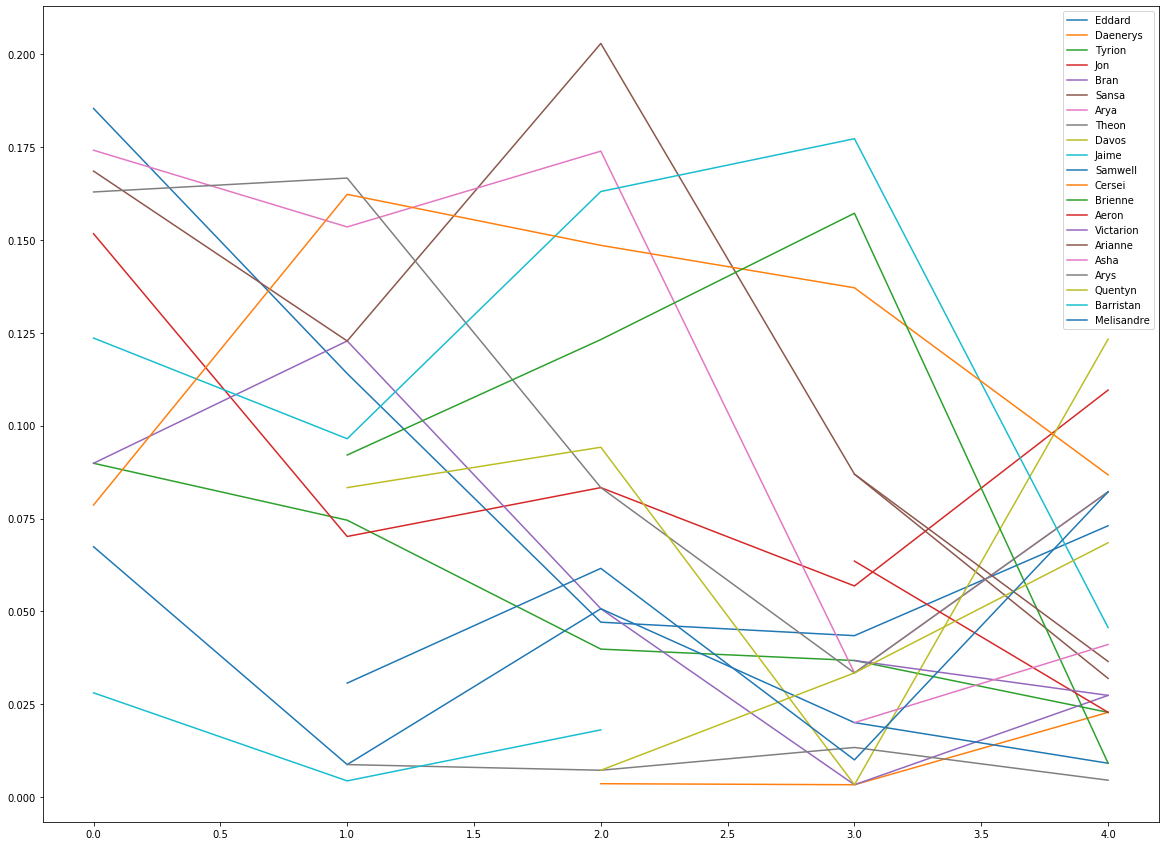

In [31]:
char_importance_df[['Eddard', 'Daenerys', 'Tyrion', 'Jon', 'Bran', 'Sansa', 'Arya', 'Theon', 'Davos', 'Jaime', 'Samwell', 'Cersei', 'Brienne', 'Aeron', 'Victarion', 'Arianne', 'Asha', 'Arys', 'Quentyn', 'Barristan', 'Melisandre']].plot()